# Using stroke dataset from Kaggle, create and train a model to predict whether an individual is at risk of stroke

In [1]:
# Import Pandas and Marplotlib
import pandas as pd
import matplotlib.pyplot as plt

## Import and clean the data

In [2]:
# Read in the csv and convert to DataFrame
data = pd.read_csv("data/stroke_dataset.csv")

In [3]:
# Preview DataFrame
data

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42,0,0,1,3,0,216.38,34.5,0,0


In [4]:
# Check for null values
data.isna().any()

sex                   True
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [5]:
# Drop all null values
data.dropna(inplace=True, how="any")

In [6]:
# Check for null values again
data.isna().any()

sex                  False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [7]:
# Reset index and preview
data.reset_index(inplace=True, drop=True)
data

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40902,1.0,38,0,0,0,4,1,120.94,29.7,1,0
40903,0.0,53,0,0,1,4,0,77.66,40.8,0,0
40904,1.0,32,0,0,1,2,0,231.95,33.2,0,0
40905,1.0,42,0,0,1,3,0,216.38,34.5,0,0


## Explore the data

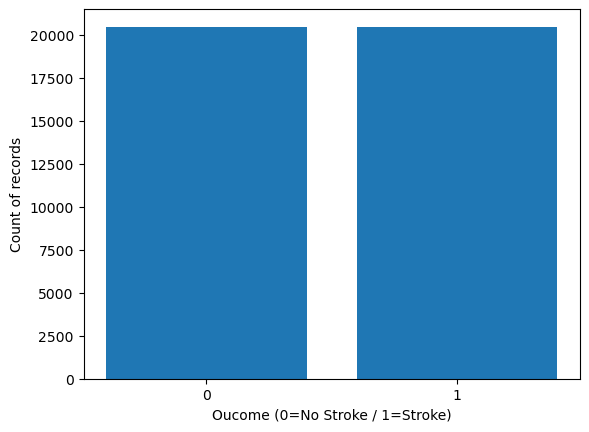

In [8]:
# Check if data balanced by outcome (number of records with each outcome)
outcome_counts = data.groupby("stroke").count().reset_index()
x_axis = outcome_counts["stroke"]
plt.bar(x_axis.astype(str), outcome_counts["hypertension"])
plt.xlabel("Oucome (0=No Stroke / 1=Stroke)")
plt.ylabel("Count of records")
plt.show()

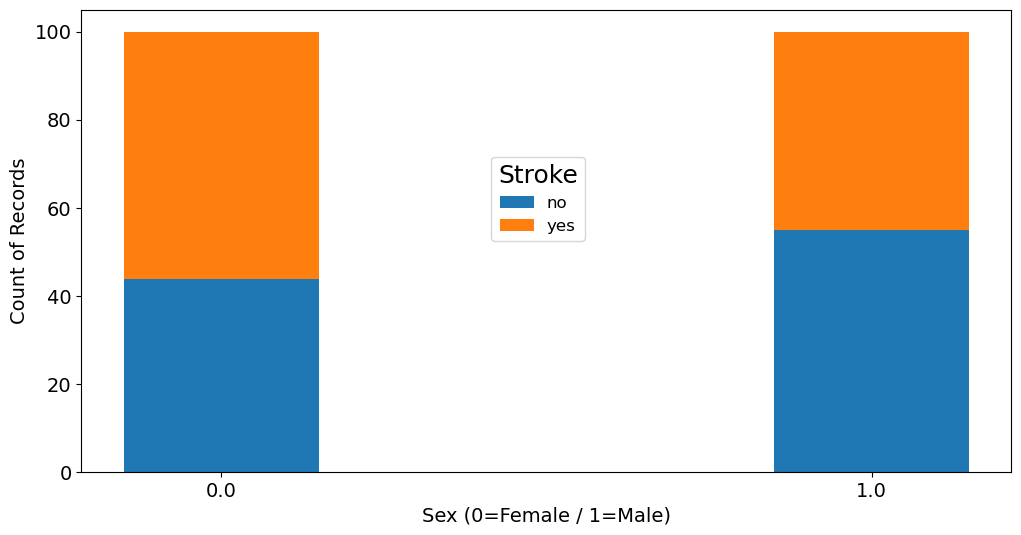

In [9]:
# Check sex distribution by condition
sex_counts = (data
      .groupby("sex")["stroke"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(sex_counts.index.astype(str), sex_counts[0], label = "No-Stroke", width = 0.3) 
ax.bar(sex_counts.index.astype(str), sex_counts[1], bottom = sex_counts[0], label = "Stroke", width = 0.3)

ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel("Count of Records", size = 14)
ax.set_xlabel("Sex (0=Female / 1=Male)", size = 14)

ax.legend(labels = ["no", "yes"],
          fontsize = 12,
          title = "Stroke",
          title_fontsize = 18,
          bbox_to_anchor = [0.55, 0.7])

plt.show()

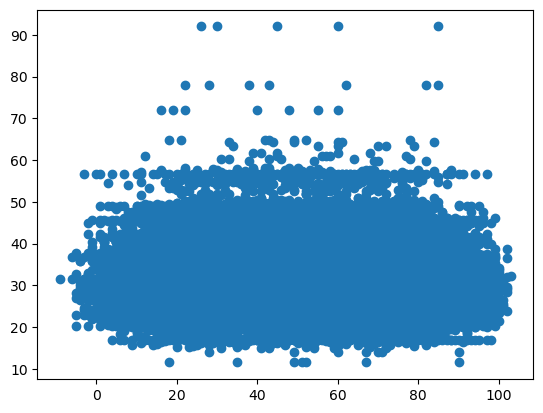

In [10]:
# Check for correlation between age and BMI
age = data["age"]
bmi = data["bmi"]
plt.scatter(age, bmi)
plt.show()

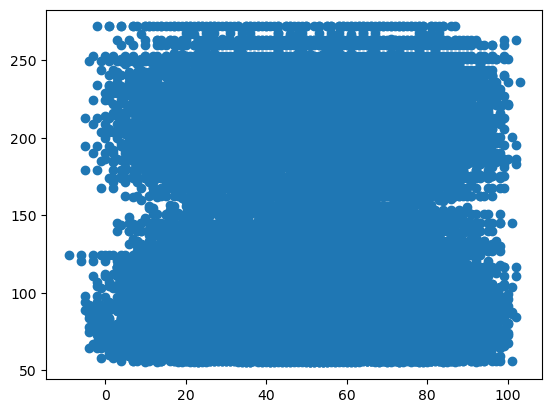

In [11]:
# Check for correlation between age and glucose
age = data["age"]
glucose = data["avg_glucose_level"]
plt.scatter(age, glucose)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

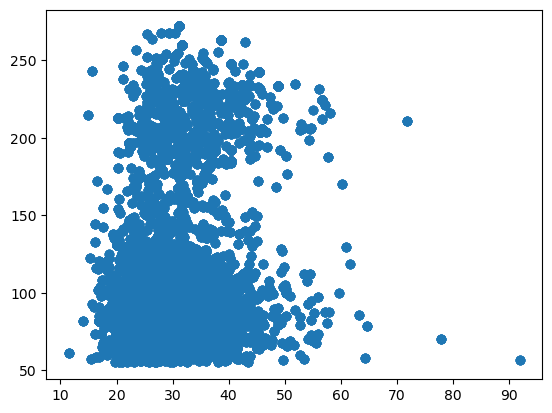

In [12]:
# Check for correlation between BMI and glucose
bmi = data["bmi"]
glucose = data["avg_glucose_level"]
plt.scatter(bmi, glucose)
plt.show

## Create a Logistic Regression model to predict risk of stroke

In [13]:
# Create features array by dropping the target and irrelevant variables
X = data.drop(columns=["ever_married", "work_type", "Residence_type", "stroke"])

# Create target array by isolating target variable
y = data["stroke"]

In [14]:
# Preview features array
X.head()

,sex,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,1.0,63,0,1,228.69,36.6,1
1,1.0,42,0,1,105.92,32.5,0
2,0.0,61,0,0,171.23,34.4,1
3,1.0,41,1,0,174.12,24.0,0
4,1.0,85,0,0,186.21,29.0,1


In [15]:
# Preview target array
y.loc[:5]

0    1
1    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [16]:
# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [17]:
# Create logistic regression model and fit to training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs", max_iter=200, random_state=1)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [18]:
# Generate predictions based on test data
predictions = classifier.predict(X_test)

In [19]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,3949,1163
Actual 1,2098,3017


In [20]:
# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71      5112
           1       0.72      0.59      0.65      5115

    accuracy                           0.68     10227
   macro avg       0.69      0.68      0.68     10227
weighted avg       0.69      0.68      0.68     10227



### The accuracy score is very poor so this model is not suitable.

## Create and train sequential NN model using Tensorflow Keras

In [21]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

In [22]:
# Re-create features and target arrays
X = data.drop(columns=["ever_married", "work_type", "Residence_type", "stroke"])
y = data["stroke"]

In [23]:
# Re-split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [24]:
# Fit the scaler to the whole features array and scale training features array
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_train_df = pd.DataFrame(scaled_X_train, columns=["sex", "age", "hypertension", "heart_disease",\
                                                         "avg_glucose_level", "bmi", "smoking_status"])
scaled_X_train_df.reset_index(drop=True, inplace=True)
scaled_X_train_df

,sex,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,-1.113658,0.072830,1.916206,-0.382625,-0.825528,-1.208525,-0.980375
1,-1.113658,0.998597,1.916206,-0.382625,1.090992,0.986089,-0.980375
2,0.897942,-1.871281,-0.521865,-0.382625,-0.967460,3.136516,-0.980375
3,-1.113658,1.554058,-0.521865,-0.382625,-0.537157,0.146539,-0.980375
4,-1.113658,-0.760360,-0.521865,-0.382625,1.072102,-0.427891,-0.980375
...,...,...,...,...,...,...,...
30675,-1.113658,0.998597,1.916206,-0.382625,0.138711,-1.517833,-0.980375
30676,0.897942,0.674579,-0.521865,-0.382625,-0.538717,-0.913946,-0.980375
30677,-1.113658,-1.223244,-0.521865,-0.382625,0.362787,-0.413162,1.020018
30678,-1.113658,-0.158612,-0.521865,-0.382625,-0.534731,-1.179067,-0.980375


In [25]:
# Scale the features testing set
scaled_X_test = scaler.transform(X_test)
scaled_X_test_df = pd.DataFrame(scaled_X_test, columns=["sex", "age", "hypertension", "heart_disease",\
                                                       "avg_glucose_level", "bmi", "smoking_status"])
scaled_X_test_df.reset_index(drop=True, inplace=True)
scaled_X_test_df

,sex,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,-1.113658,0.767156,-0.521865,-0.382625,-0.664359,-0.103854,-0.980375
1,0.897942,0.813444,-0.521865,-0.382625,-0.802652,-1.208525,1.020018
2,-1.113658,-1.732416,1.916206,-0.382625,-1.050124,-0.751928,1.020018
3,-1.113658,0.859732,-0.521865,-0.382625,-0.925175,-0.398433,1.020018
4,0.897942,0.396849,-0.521865,-0.382625,0.155521,1.663621,-0.980375
...,...,...,...,...,...,...,...
10222,0.897942,0.998597,1.916206,-0.382625,-0.578922,0.558949,1.020018
10223,-1.113658,-0.343765,-0.521865,-0.382625,-0.074794,-1.252712,1.020018
10224,0.897942,-0.991802,1.916206,2.613527,2.224371,-0.339517,1.020018
10225,0.897942,-1.362109,1.916206,-0.382625,-1.116844,1.295397,1.020018


In [26]:
# Import Tensorflow
import tensorflow as tf

In [27]:
# Create sequential model with four hidden layers
nn_model_8 = tf.keras.models.Sequential()
nn_model_8.add(tf.keras.layers.Dense(units=65, activation="relu", input_dim=7))
nn_model_8.add(tf.keras.layers.Dense(units=65, activation="relu"))
nn_model_8.add(tf.keras.layers.Dense(units=45, activation="relu"))
nn_model_8.add(tf.keras.layers.Dense(units=25, activation="relu"))
nn_model_8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                520       
                                                                 
 dense_1 (Dense)             (None, 65)                4290      
                                                                 
 dense_2 (Dense)             (None, 45)                2970      
                                                                 
 dense_3 (Dense)             (None, 25)                1150      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8956 (34.98 KB)
Trainable params: 8956 (34.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Train model using training data
nn_model_8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model_8 = nn_model_8.fit(scaled_X_train_df, y_train, epochs=200)

Epoch 1/200
959/959 [==============================] - 5s 4ms/step - loss: 0.5920 - accuracy: 0.6861
Epoch 2/200
959/959 [==============================] - 4s 4ms/step - loss: 0.5662 - accuracy: 0.7054
Epoch 3/200
959/959 [==============================] - 4s 4ms/step - loss: 0.5484 - accuracy: 0.7182
Epoch 4/200
959/959 [==============================] - 3s 4ms/step - loss: 0.5267 - accuracy: 0.7259
Epoch 5/200
959/959 [==============================] - 3s 4ms/step - loss: 0.5072 - accuracy: 0.7345
Epoch 6/200
959/959 [==============================] - 3s 4ms/step - loss: 0.4897 - accuracy: 0.7430
Epoch 7/200
959/959 [==============================] - 4s 4ms/step - loss: 0.4737 - accuracy: 0.7540
Epoch 8/200
959/959 [==============================] - 4s 4ms/step - loss: 0.4602 - accuracy: 0.7623
Epoch 9/200
959/959 [==============================] - 4s 4ms/step - loss: 0.4432 - accuracy: 0.7717
Epoch 10/200
959/959 [==============================] - 4s 4ms/step - loss: 0.4288 - accura

959/959 [==============================] - 3s 3ms/step - loss: 0.1093 - accuracy: 0.9604
Epoch 82/200
959/959 [==============================] - 3s 3ms/step - loss: 0.1116 - accuracy: 0.9595
Epoch 83/200
959/959 [==============================] - 3s 3ms/step - loss: 0.1088 - accuracy: 0.9608
Epoch 84/200
959/959 [==============================] - 3s 3ms/step - loss: 0.1066 - accuracy: 0.9617
Epoch 85/200
959/959 [==============================] - 3s 3ms/step - loss: 0.1032 - accuracy: 0.9618
Epoch 86/200
959/959 [==============================] - 3s 3ms/step - loss: 0.1087 - accuracy: 0.9601
Epoch 87/200
959/959 [==============================] - 3s 3ms/step - loss: 0.1022 - accuracy: 0.9631
Epoch 88/200
959/959 [==============================] - 3s 3ms/step - loss: 0.1085 - accuracy: 0.9625
Epoch 89/200
959/959 [==============================] - 3s 3ms/step - loss: 0.1123 - accuracy: 0.9596
Epoch 90/200
959/959 [==============================] - 3s 4ms/step - loss: 0.0933 - accuracy: 

959/959 [==============================] - 3s 3ms/step - loss: 0.0759 - accuracy: 0.9752
Epoch 161/200
959/959 [==============================] - 3s 3ms/step - loss: 0.0691 - accuracy: 0.9777
Epoch 162/200
959/959 [==============================] - 3s 3ms/step - loss: 0.0748 - accuracy: 0.9756
Epoch 163/200
959/959 [==============================] - 3s 3ms/step - loss: 0.0701 - accuracy: 0.9751
Epoch 164/200
959/959 [==============================] - 4s 4ms/step - loss: 0.0735 - accuracy: 0.9746
Epoch 165/200
959/959 [==============================] - 4s 4ms/step - loss: 0.0680 - accuracy: 0.9771
Epoch 166/200
959/959 [==============================] - 3s 3ms/step - loss: 0.0731 - accuracy: 0.9744
Epoch 167/200
959/959 [==============================] - 3s 3ms/step - loss: 0.0665 - accuracy: 0.9772
Epoch 168/200
959/959 [==============================] - 3s 3ms/step - loss: 0.0756 - accuracy: 0.9739
Epoch 169/200
959/959 [==============================] - 3s 3ms/step - loss: 0.0650 - a

In [29]:
# Evaluate model accuracy
model_loss, model_accuracy = nn_model_8.evaluate(scaled_X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

320/320 - 1s - loss: 0.0733 - accuracy: 0.9758 - 565ms/epoch - 2ms/step
Loss: 0.07329511642456055, Accuracy: 0.9757504463195801


In [30]:
# Pickle model for later use in Flask
import pickle
filename = "stroke_model.sav"
pickle.dump(nn_model_8, open(filename, "wb"))

## Calculate mean and SD for each feature from training data to use in scaling of unseen data

In [31]:
# Calculate age mean and SD to use in scaling unseen data
age_mean = X_train["age"].mean()
age_std = X_train["age"].std()
print(f"Age Mean: {age_mean}, Age STD: {age_std}")

Age Mean: 51.42659713168188, Age STD: 21.60405630341289


In [32]:
# Calculate glucose mean and SD to use in scaling unseen data
glucose_mean = X_train["avg_glucose_level"].mean()
glucose_std = X_train["avg_glucose_level"].std()
print(f"Glucose Mean: {glucose_mean}, Glucose STD: {glucose_std}")

Glucose Mean: 122.53588754889178, Glucose STD: 57.70449908538411


In [33]:
# Calculate BMI mean and SD to use in scaling unseen data
bmi_mean = X_train["bmi"].mean()
bmi_std = X_train["bmi"].std()
print(f"BMI Mean: {bmi_mean}, BMI STD: {bmi_std}")

BMI Mean: 30.405097783572355, BMI STD: 6.78945886003209


In [34]:
# Calculate sex mean and SD to use in scaling unseen data
sex_mean = X_train["sex"].mean()
sex_std = X_train["sex"].std()
print(f"Sex Mean: {sex_mean}, Sex STD: {sex_std}")

Sex Mean: 0.5536179921773142, Sex STD: 0.4971248999023411


In [35]:
# Calculate hypertension mean and SD to use in scaling unseen data
hypertension_mean = X_train["hypertension"].mean()
hypertension_std = X_train["hypertension"].std()
print(f"Hypertension Mean: {hypertension_mean}, Hypertension STD: {hypertension_std}")

Hypertension Mean: 0.21404823989569752, Hypertension STD: 0.4101671299612824


In [36]:
# Calculate heart disease mean and SD to use in scaling unseen data
heart_disease_mean = X_train["heart_disease"].mean()
heart_disease_std = X_train["heart_disease"].std()
print(f"Heart disease Mean: {heart_disease_mean}, Heart disease STD: {heart_disease_std}")

Heart disease Mean: 0.12770534550195567, Heart disease STD: 0.33376686664892674


In [37]:
# Calculate smoking mean and SD to use in scaling unseen data
smoker_mean = X_train["smoking_status"].mean()
smoker_std = X_train["smoking_status"].std()
print(f"Smoker Mean: {smoker_mean}, Smoker STD: {smoker_std}")

Smoker Mean: 0.49009126466753583, Smoker STD: 0.4999099545521639


## Create fake unseen data and test model usability

In [38]:
# Create unseen features array with fake user input 
unseen_test_data = {"sex": [0], "Age_1": [85], "hypertension": [0], "Glucose_1": [216.38], "heart_disease": [0], "Smoking_status": [1], "BMI_1": [34.5]}
unseen_test_data_df = pd.DataFrame(unseen_test_data)
unseen_test_data_df

,sex,Age_1,hypertension,Glucose_1,heart_disease,Smoking_status,BMI_1
0,0,85,0,216.38,0,1,34.5


In [39]:
# Scale age using mean and SD calculated from training data
scaled_age = (unseen_test_data["Age_1"] - age_mean) / age_std
print(scaled_age)

[1.55403237]


In [40]:
# Scaleglucose age using mean and SD calculated from training data
scaled_glucose = (unseen_test_data["Glucose_1"] - glucose_mean) / glucose_std
print(scaled_glucose)

[1.62628762]


In [41]:
# Scale BMI using mean and SD calculated from training data
scaled_bmi = (unseen_test_data["BMI_1"] - bmi_mean) / bmi_std
print(scaled_bmi)

[0.60312645]


In [42]:
# Scale sex using mean and SD calculated from training data
scaled_sex = (unseen_test_data["sex"] - sex_mean) / sex_std
print(scaled_sex)

[-1.11363964]


In [43]:
# Scale hypertension using mean and SD calculated from training data
scaled_hypertension = (unseen_test_data["hypertension"] - hypertension_mean) / hypertension_std
print(scaled_hypertension)

[-0.52185615]


In [44]:
# Scale heart disease using mean and SD calculated from training data
scaled_heart_disease = (unseen_test_data["heart_disease"] - heart_disease_mean) / heart_disease_std
print(scaled_heart_disease)

[-0.3826184]


In [45]:
# Scale smoking using mean and SD calculated from training data
scaled_smoker = (unseen_test_data["Smoking_status"] - smoker_mean) / smoker_std
print(scaled_smoker)

[1.02000116]


In [46]:
# Create DataFrame of scaled data
scaled_unseen_df = pd.DataFrame({"sex": scaled_sex, "age": scaled_age, "hypertension": scaled_hypertension,\
                                "heart_disease": scaled_heart_disease, "avg_glucose_level": scaled_glucose,\
                                "bmi": scaled_bmi, "smoking_status": scaled_smoker})
scaled_unseen_df

,sex,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,-1.11364,1.554032,-0.521856,-0.382618,1.626288,0.603126,1.020001


In [47]:
# Use model to generate prediction for unseen data
result_final = nn_model_8.predict(scaled_unseen_df)
print(result_final)

1/1 [==============================] - 0s 94ms/step
[[0.23464008]]
